### ML Project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_root_dir = "C:\\Users\\sachin\\OneDrive - Grras Solution Pvt. Ltd\\ML_BATCH_2021\\MachineLearning\\Notebooks\\datasets"

In [3]:
!ls "$data_root_dir"

housing
inception
lifesat


In [4]:
!ls "$data_root_dir"/housing

README.md
housing.csv
housing.tgz


In [232]:
import os
data_path = os.path.join(data_root_dir, 'housing\housing.csv')
housing = pd.read_csv(data_path)

housing.dropna(inplace=True)

In [233]:
housing.head() # California 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


    NLP
    
        hindi audio --> text  -> numerical 

#### Steps to ML Project 

1. Define Your Problem / Brain Stroming

    what is problem
    
    what is the existing solution to that and accuracy of that solutions, 20 % error 
    
    which type of problem is this -> supervised, unsupervised, deep learning ? 
    
    you set a goal -> accuracy -> more than 85 % will work 
    
2. Get Data

    Data Collection Technique 
    
3. Data Analysis & Visualization to get insights about data 

    we try to explore data to answer certain questions ? 
    
        which features are more important than other 
        
        which features are useless 
        
        do we need add more features ? 
        
        hypothesis testing ? will this data usefull to create machine learning model
        
        shape, distributions of data 
        
4. Prepare Data For Machine Learning Algorithms

    making data suitable for machine learning algorithms 
    
    all data needs to be numerical and some time normalized (scaled too)
    
5. Model Selection and Training

    we select models (many algorithms) and train them using training data 
    
6. Fine Tune Models 
    
    improvising Model Parameters 
    
7. Deploy Your Model in Real Life
        
    
    integrate model with real life application
    
    making model accessible to general public / consumers (deploy)
    
8. Monitor, Maintain 
        

### Split Your Data into Train and Test Set

In [234]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [235]:
target = 'median_house_value'

In [236]:
y = housing[target]
X = housing.drop(target, axis=1)

In [237]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [238]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [239]:
def train_test_split(X, y=None, test_ratio=0.2, show_output=False):
    size = X.shape[0]
    test_idx = int(size * test_ratio)
    train_idx = size - test_idx 
    if show_output:
        print("Total: ", size)
        print("Train: ", train_idx)
        print("Test : ", test_idx)
    
    train_X = X[:train_idx]
    test_X = X[train_idx:]
    if y is not None:
        train_y = y[:train_idx]
        test_y = y[train_idx:]
        return train_X, test_X, train_y, test_y
    return train_X, test_X

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, show_output=True, test_ratio=0.2)

Total:  20433
Train:  16347
Test :  4086


In [241]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [242]:
X_train.shape

(16347, 9)

In [243]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16506,-121.13,37.73,40.0,1126.0,220.0,667.0,235.0,3.3158,INLAND
16507,-121.11,37.74,11.0,3886.0,599.0,1605.0,529.0,4.4213,INLAND
16508,-121.10,37.80,35.0,1853.0,331.0,958.0,340.0,3.3578,INLAND
16509,-121.11,37.76,22.0,2606.0,411.0,1252.0,397.0,4.1833,INLAND
16510,-121.16,37.73,7.0,4956.0,941.0,3006.0,915.0,3.4426,INLAND


In [244]:
X_test.shape

(4086, 9)

In [245]:
y_test.head()

16506    125900.0
16507    182700.0
16508    149000.0
16509    192100.0
16510    139000.0
Name: median_house_value, dtype: float64

In [246]:
a = np.random.randint(10, 50, 20)

In [247]:
a

array([23, 27, 30, 34, 36, 49, 10, 12, 42, 39, 34, 12, 41, 29, 37, 13, 17,
       37, 43, 19])

In [248]:
a[ [0, 5, 2, 7, ] ]

array([23, 49, 30, 12])

In [249]:
def train_test_split(X, y=None, test_ratio=0.2, show_output=False, random_state=123):
    np.random.seed(random_state)
    size = X.shape[0]
    test_size = int(size * test_ratio)
    train_size = size - test_size 
    indexes = np.arange(size)
    np.random.shuffle(indexes)
    
    train_idx = indexes[:train_size]
    test_idx = indexes[train_size:]
    train_X = X.iloc[train_idx]
    test_X = X.iloc[test_idx]
    if y is not None:
        train_y = y.iloc[train_idx]
        test_y = y.iloc[test_idx]
        return train_X, test_X, train_y, test_y
    return train_X, test_X

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)

In [251]:
X_train.shape

(16347, 9)

In [252]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14354,-117.23,32.75,23.0,2415.0,653.0,1275.0,596.0,3.1389,NEAR OCEAN
12908,-121.29,38.63,24.0,2868.0,527.0,1284.0,487.0,3.3182,INLAND
19545,-120.97,37.63,39.0,2360.0,607.0,2047.0,605.0,1.7054,INLAND
12188,-117.35,33.69,11.0,1229.0,236.0,581.0,190.0,3.1020,<1H OCEAN
14786,-117.12,32.57,21.0,1738.0,295.0,983.0,298.0,4.8274,NEAR OCEAN


In [253]:
y_train.head()

14354    101800.0
12908    213000.0
19545     58800.0
12188    111300.0
14786    174100.0
Name: median_house_value, dtype: float64

In [254]:
(X['ocean_proximity'].value_counts() / X.shape[0] )*100

<1H OCEAN     44.212793
INLAND        31.791709
NEAR OCEAN    12.861547
NEAR BAY      11.109480
ISLAND         0.024470
Name: ocean_proximity, dtype: float64

In [255]:
(X_train['ocean_proximity'].value_counts() / X_train.shape[0] )*100

<1H OCEAN     44.154891
INLAND        31.859057
NEAR OCEAN    12.840277
NEAR BAY      11.121307
ISLAND         0.024469
Name: ocean_proximity, dtype: float64

In [256]:
(X_test['ocean_proximity'].value_counts() / X_test.shape[0] )*100

<1H OCEAN     44.444444
INLAND        31.522271
NEAR OCEAN    12.946647
NEAR BAY      11.062163
ISLAND         0.024474
Name: ocean_proximity, dtype: float64

In [257]:
from sklearn.model_selection import train_test_split
# Random Split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [259]:
X_train.shape

(16346, 9)

In [260]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2851,-118.95,35.38,35.0,2220.0,388.0,906.0,373.0,3.5938,INLAND
16353,-121.32,38.04,30.0,249.0,44.0,167.0,45.0,4.5000,INLAND
13403,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,INLAND
1781,-122.36,37.94,45.0,907.0,188.0,479.0,161.0,3.0862,NEAR BAY
2005,-119.80,36.74,25.0,1717.0,542.0,1343.0,471.0,0.7990,INLAND


In [261]:
(X_train['ocean_proximity'].value_counts() / X_train.shape[0] )*100

<1H OCEAN     44.127004
INLAND        31.799829
NEAR OCEAN    12.822709
NEAR BAY      11.225988
ISLAND         0.024471
Name: ocean_proximity, dtype: float64

In [262]:
(X_test['ocean_proximity'].value_counts() / X_test.shape[0] )*100

<1H OCEAN     44.555909
INLAND        31.759237
NEAR OCEAN    13.016883
NEAR BAY      10.643504
ISLAND         0.024468
Name: ocean_proximity, dtype: float64

In [263]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [264]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2851,-118.95,35.38,35.0,2220.0,388.0,906.0,373.0,3.5938,INLAND
16353,-121.32,38.04,30.0,249.0,44.0,167.0,45.0,4.5000,INLAND
13403,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,INLAND
1781,-122.36,37.94,45.0,907.0,188.0,479.0,161.0,3.0862,NEAR BAY
2005,-119.80,36.74,25.0,1717.0,542.0,1343.0,471.0,0.7990,INLAND


    add these points on california map

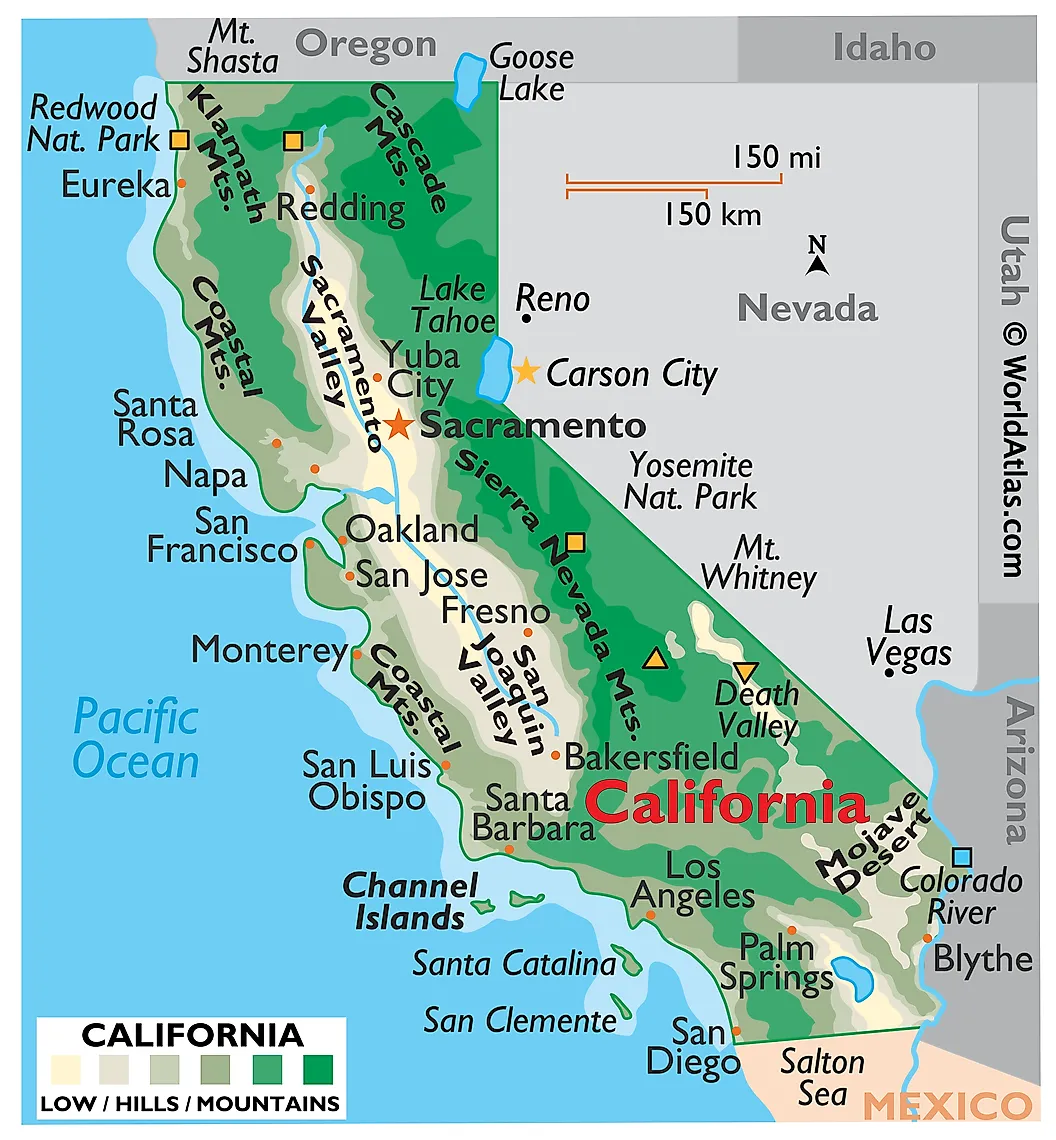

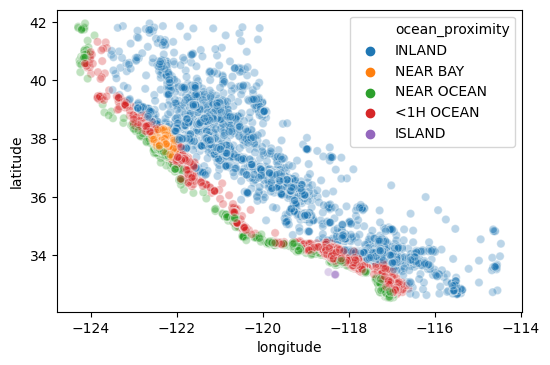

In [265]:
plt.figure(dpi=100)
sns.scatterplot('longitude', 'latitude', data=X_train,
               hue='ocean_proximity', alpha=0.3)

plt.show()

In [266]:
y_train.shape

(16346,)

In [267]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


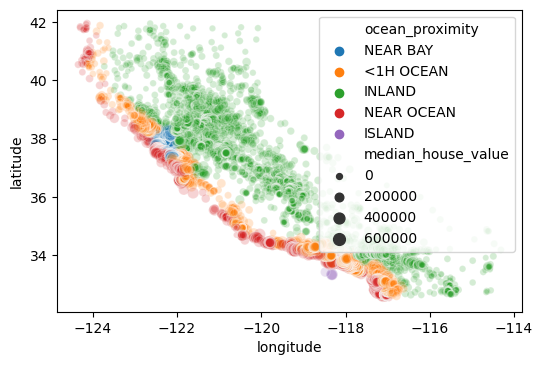

In [268]:
plt.figure(dpi=100)
sns.scatterplot('longitude', 'latitude', data=housing, alpha=0.2,
               size='median_house_value',
               hue='ocean_proximity')

plt.show()

In [269]:
housing.groupby('ocean_proximity')[['median_house_value']].count().sort_values(ascending=False,
                                                                              by='median_house_value')

,median_house_value
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [270]:
housing.groupby('ocean_proximity').agg( { 'median_house_value': 'mean' } ).sort_values(ascending=False,
                                                                                       by='median_house_value')

,median_house_value
ocean_proximity,
ISLAND,380440.000000
NEAR BAY,259279.292070
NEAR OCEAN,249042.355023
<1H OCEAN,240267.990812
INLAND,124896.863147


In [271]:
corr = X_train.corrwith(y_train).sort_values(ascending=False)
corr

median_income         0.687798
total_rooms           0.130174
housing_median_age    0.110751
households            0.063115
total_bedrooms        0.047484
population           -0.027165
longitude            -0.044335
latitude             -0.146510
dtype: float64

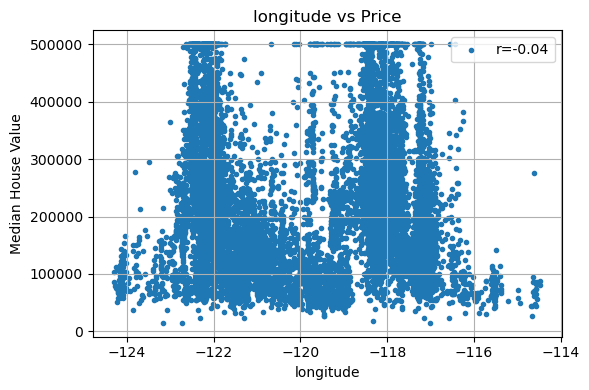

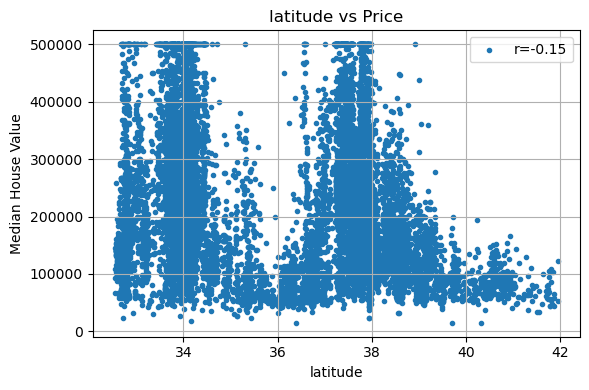

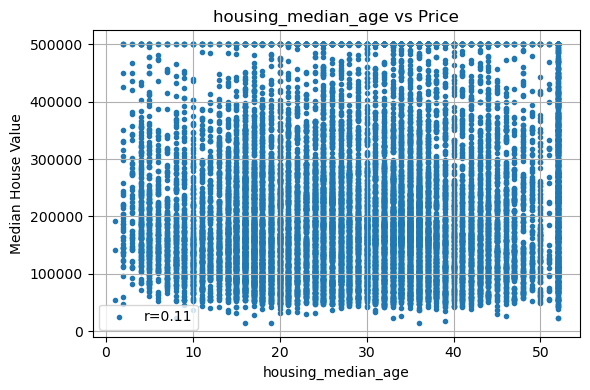

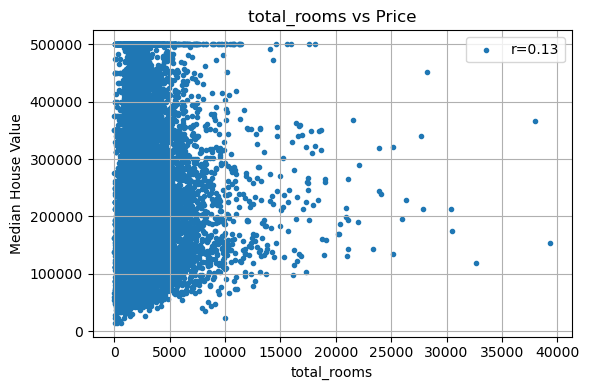

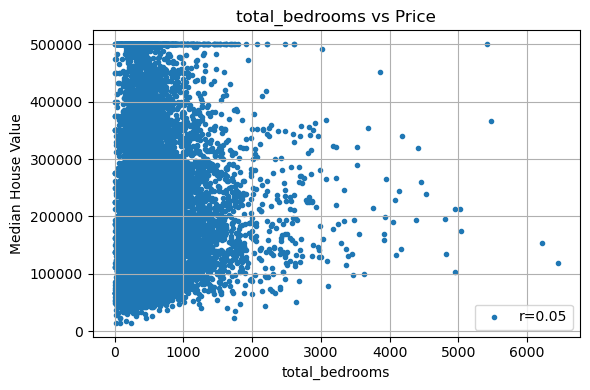

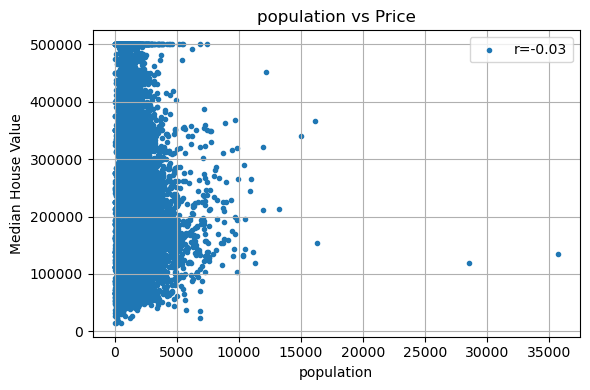

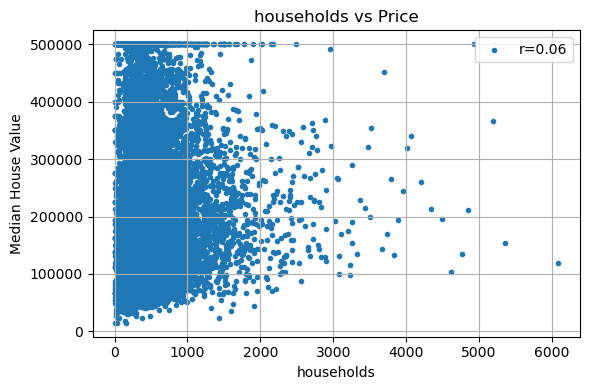

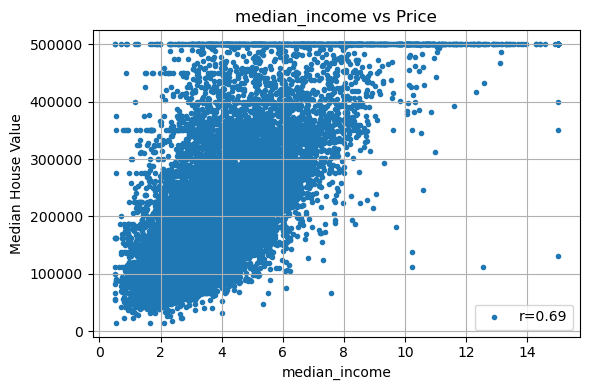

In [272]:
for column in X_train:
    if column == 'ocean_proximity':
        continue
    plt.figure(dpi=100)
    plt.title(f'{column} vs Price')
    plt.scatter(X_train[column], y_train, marker='.', label=f"r={corr[column]:.2f}")
    plt.xlabel(column)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    

In [273]:
long_lat = (X_train['longitude'] + X_train['latitude'] )

In [274]:
corr

median_income         0.687798
total_rooms           0.130174
housing_median_age    0.110751
households            0.063115
total_bedrooms        0.047484
population           -0.027165
longitude            -0.044335
latitude             -0.146510
dtype: float64

In [275]:
np.corrcoef(long_lat, y_train)[0, 1]

-0.4912358749180397

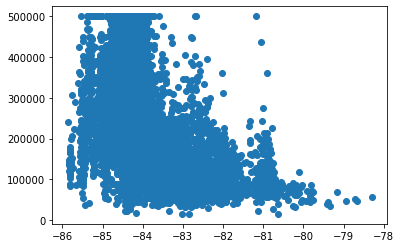

In [276]:
plt.scatter(long_lat, y_train)
plt.show()

### Sampling Techniques

    1. Sequential Sampling
    2. Random Sampling
    3. Stratified Sampling

    we know throgh analysis that median_income is most important feature

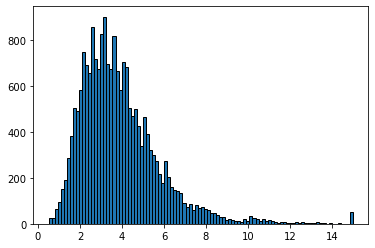

In [277]:
plt.hist(housing['median_income'], bins=100, ec='k')
plt.show()

In [278]:
housing['median_income'].describe()

count    20433.000000
mean         3.871162
std          1.899291
min          0.499900
25%          2.563700
50%          3.536500
75%          4.744000
max         15.000100
Name: median_income, dtype: float64

In [279]:
# important -> pd.cut, how you can convert a continous column into a category column
housing['income_cat'] = pd.cut(housing['median_income'], 
       bins=[0, 2, 4, 6, 8, np.inf],
       labels = ['very low', 'low', 'average', 'high', 'very high']
      )

In [280]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,very high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,very high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,average
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,low
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,average
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,low
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,low
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,low
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,low


In [281]:
housing.shape

(20433, 11)

In [282]:
housing['income_cat'].value_counts()

low          9991
average      5676
very low     2429
high         1656
very high     681
Name: income_cat, dtype: int64

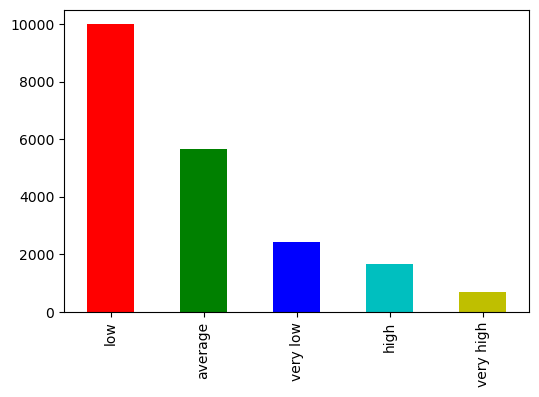

In [283]:
plt.figure(dpi=100)
housing['income_cat'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'c', 'y'])
plt.show()

low          48.896393
average      27.778593
very low     11.887633
high          8.104537
very high     3.332844
Name: income_cat, dtype: float64


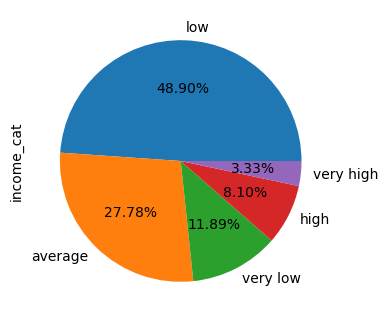

In [284]:
print((housing['income_cat'].value_counts() / housing.shape[0] )*100)
plt.figure(dpi=100)
((housing['income_cat'].value_counts() / housing.shape[0] )*100 ).plot(kind='pie',
                                                                      autopct='%.2f%%')
plt.show()

In [285]:
from sklearn.model_selection import train_test_split

average      48.896393
high         27.778593
low          11.887633
very high     8.104537
very rich     3.332844
Name: income_cat, dtype: float64


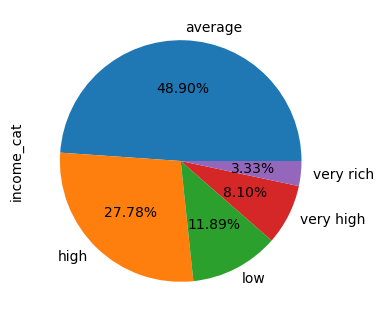

In [286]:
X['income_cat'] = pd.cut(X['median_income'], 
       bins=[0, 2, 4, 6, 8, np.inf],
       labels = [ 'low', 'average', 'high', 'very high', 'very rich']
      )
print((X['income_cat'].value_counts() / X.shape[0] )*100)
plt.figure(dpi=100)
((X['income_cat'].value_counts() / X.shape[0] )*100 ).plot(kind='pie',
                                                                      autopct='%.2f%%')
plt.show()

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)


average      48.849872
high         27.817203
low          11.947877
very high     8.014193
very rich     3.370855
Name: income_cat, dtype: float64


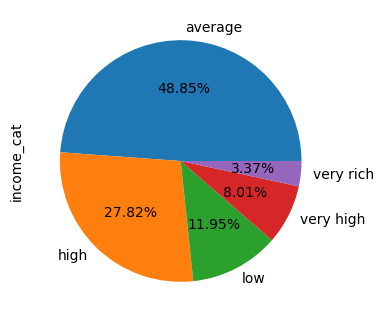

In [307]:
print((X_train['income_cat'].value_counts() / X_train.shape[0] )*100)
plt.figure(dpi=100)
((X_train['income_cat'].value_counts() / X_train.shape[0] )*100 ).plot(kind='pie',
                                                                      autopct='%.2f%%')
plt.show()

average      49.082457
high         27.624174
low          11.646685
very high     8.465867
very rich     3.180817
Name: income_cat, dtype: float64


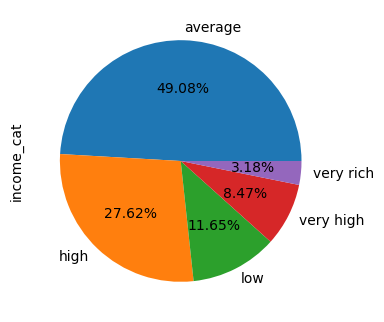

In [308]:
print((X_test['income_cat'].value_counts() / X_test.shape[0] )*100)
plt.figure(dpi=100)
((X_test['income_cat'].value_counts() / X_test.shape[0] )*100 ).plot(kind='pie',
                                                                      autopct='%.2f%%')
plt.show()

In [309]:
from sklearn.model_selection import StratifiedShuffleSplit

In [310]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

In [311]:
(X['ocean_proximity'].value_counts() / X.shape[0] )*100

<1H OCEAN     44.212793
INLAND        31.791709
NEAR OCEAN    12.861547
NEAR BAY      11.109480
ISLAND         0.024470
Name: ocean_proximity, dtype: float64

In [312]:
(train_idxs, test_idxs), = split.split(X, X[['ocean_proximity']]) # [ (train, test) ]
# 0-n-1 python indexes
# [ (train_1, test_1), (train_2, test_2) ]

In [ ]:
# 0, 1, 2, 3, 4, 5, 6 ,7, ..., n-1
# 0, 1, 3, 4, 6, 9,........., n-1

In [313]:
X_train = X.iloc[train_idxs]
X_test = X.iloc[test_idxs]

In [314]:
(X_train['ocean_proximity'].value_counts() / X_train.shape[0]) * 100

<1H OCEAN     44.212651
INLAND        31.793711
NEAR OCEAN    12.859415
NEAR BAY      11.109752
ISLAND         0.024471
Name: ocean_proximity, dtype: float64

In [315]:
(X_test['ocean_proximity'].value_counts() / X_test.shape[0]) * 100

<1H OCEAN     44.213359
INLAND        31.783704
NEAR OCEAN    12.870076
NEAR BAY      11.108392
ISLAND         0.024468
Name: ocean_proximity, dtype: float64

In [316]:
(X_train['income_cat'].value_counts() / X_train.shape[0]) * 100

average      48.984461
high         27.633672
low          11.972348
very high     8.063135
very rich     3.346384
Name: income_cat, dtype: float64

In [317]:
(X_test['income_cat'].value_counts() / X_test.shape[0]) * 100

average      48.544164
high         28.358209
low          11.548813
very high     8.270125
very rich     3.278689
Name: income_cat, dtype: float64

In [318]:
(train_idxs, test_idxs), = split.split(X, X['income_cat'])

In [319]:
X_train = X.iloc[train_idxs]
X_test = X.iloc[test_idxs]
y_train = y.iloc[train_idxs]
y_test = y.iloc[test_idxs]

In [320]:
def get_ratio(df, col):
    frac = (df[col].value_counts() / df.shape[0]) * 100
    print(frac)

In [321]:
print("Data set")
get_ratio(X, 'income_cat')

Data set
average      48.896393
high         27.778593
low          11.887633
very high     8.104537
very rich     3.332844
Name: income_cat, dtype: float64


In [322]:
print('Train Set')
get_ratio(X_train, 'income_cat')

Train Set
average      48.892695
high         27.780497
low          11.886700
very high     8.105959
very rich     3.334149
Name: income_cat, dtype: float64


In [323]:
print('Test Set')
get_ratio(X_test, 'income_cat')

Test Set
average      48.911182
high         27.770981
low          11.891363
very high     8.098850
very rich     3.327624
Name: income_cat, dtype: float64


In [325]:
# [ (train_1, test_1), (train_2, test_2) ]
def stratified_sample(X, y, col, test_size=0.2, random_state=123):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size,
                                  random_state=random_state)
    for train_idxs, test_idxs in split.split(X, X[col]):
        X_train = X.iloc[train_idxs]
        y_train = y.iloc[train_idxs]
        X_test  = X.iloc[test_idxs]
        y_test  = y.iloc[test_idxs]
    return X_train, X_test, y_train, y_test 

In [326]:
X_train, X_test, y_train, y_test = stratified_sample(X, y, 'income_cat')

In [327]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5371,-118.38,34.04,31.0,2846.0,727.0,2120.0,672.0,2.7226,<1H OCEAN,average
4418,-118.25,34.09,52.0,3142.0,765.0,1728.0,682.0,3.1864,<1H OCEAN,average
18463,-121.70,37.20,15.0,531.0,154.0,469.0,155.0,4.6500,<1H OCEAN,high
18892,-122.24,38.11,52.0,2111.0,310.0,772.0,323.0,4.7750,NEAR BAY,high
565,-122.24,37.76,52.0,2646.0,581.0,1128.0,522.0,3.0718,NEAR BAY,average


In [328]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3305,-122.65,38.96,27.0,2143.0,580.0,898.0,367.0,1.6769,INLAND,low
19668,-120.83,37.50,30.0,1340.0,244.0,631.0,231.0,3.3750,INLAND,average
14657,-117.15,32.78,25.0,1577.0,266.0,611.0,284.0,5.2500,NEAR OCEAN,high
3940,-118.59,34.21,34.0,1943.0,320.0,895.0,305.0,5.0462,<1H OCEAN,high
9307,-122.52,37.98,31.0,6555.0,1571.0,2962.0,1464.0,2.8903,NEAR BAY,average


In [329]:
get_ratio(X_train, 'income_cat')

average      48.892695
high         27.780497
low          11.886700
very high     8.105959
very rich     3.334149
Name: income_cat, dtype: float64


In [330]:
get_ratio(X_test, 'income_cat')

average      48.911182
high         27.770981
low          11.891363
very high     8.098850
very rich     3.327624
Name: income_cat, dtype: float64


In [331]:
X_train.shape

(16346, 10)

In [332]:
X_test.shape

(4087, 10)

In [333]:
X_train.drop('income_cat', axis=1, inplace=True)
X_test.drop('income_cat', axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [334]:
X_train.shape

(16346, 9)

In [335]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5371,-118.38,34.04,31.0,2846.0,727.0,2120.0,672.0,2.7226,<1H OCEAN
4418,-118.25,34.09,52.0,3142.0,765.0,1728.0,682.0,3.1864,<1H OCEAN
18463,-121.70,37.20,15.0,531.0,154.0,469.0,155.0,4.6500,<1H OCEAN
18892,-122.24,38.11,52.0,2111.0,310.0,772.0,323.0,4.7750,NEAR BAY
565,-122.24,37.76,52.0,2646.0,581.0,1128.0,522.0,3.0718,NEAR BAY


In [336]:
corr

median_income         0.687798
total_rooms           0.130174
housing_median_age    0.110751
households            0.063115
total_bedrooms        0.047484
population           -0.027165
longitude            -0.044335
latitude             -0.146510
dtype: float64

#### Doubt 

### Continous 

    summary -> mean, median, mode, std, percentile, decile, correlation, covariance, IQR, quantiles

### Category
        
        ordinal    nominal

    ratio 

In [337]:
X_train.drop('ocean_proximity', axis=1, inplace=True)
X_test.drop('ocean_proximity', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [338]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5371,-118.38,34.04,31.0,2846.0,727.0,2120.0,672.0,2.7226
4418,-118.25,34.09,52.0,3142.0,765.0,1728.0,682.0,3.1864
18463,-121.70,37.20,15.0,531.0,154.0,469.0,155.0,4.6500
18892,-122.24,38.11,52.0,2111.0,310.0,772.0,323.0,4.7750
565,-122.24,37.76,52.0,2646.0,581.0,1128.0,522.0,3.0718
...,...,...,...,...,...,...,...,...
2633,-124.17,40.62,32.0,1595.0,309.0,706.0,277.0,2.8958
2066,-119.82,36.64,30.0,1694.0,312.0,1008.0,321.0,2.2466
12991,-121.25,38.70,16.0,3262.0,533.0,1794.0,543.0,4.2464
1203,-121.74,39.38,27.0,2596.0,435.0,1100.0,409.0,2.3243


In [339]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [340]:
models = [
    ( 'linear regression', LinearRegression()),
    ( 'sgd', SGDRegressor()),
    ( 'Tree', RandomForestRegressor()),
    ( 'KNN',  KNeighborsRegressor())
]

In [341]:
from sklearn.metrics import mean_squared_error, r2_score

#400 kg^2 -> 20 kg
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [342]:
def model_report(models):
    for name, model in models:
        print(f"Model {name}".center(80))
        print()
        model.fit(X_train, y_train)
        y_hat = model.predict(X_train)
        print(f"Training Error of {name:^20} Model: {rmse(y_train, y_hat):.2f}")
        print(f"Training Accuracy of {name:^20} Model: {r2_score(y_train, y_hat)*100:.2f}")
        y_hat = model.predict(X_test)
        print('--'*40)
        print(f"Test Error of {name:^20} Model: {rmse(y_test, y_hat):.2f}")
        print(f"Test Accuracy of {name:^20} Model: {r2_score(y_test, y_hat)*100:.2f}")
        
        print('\n\n')
        print('__'*40)
        print('\n\n')

In [344]:
y.describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [347]:
(69455 / 179700) * 100 # 85 % 

38.650528658875906

In [348]:
model_report(models)

                            Model linear regression                             

Training Error of  linear regression   Model: 69455.15
Training Accuracy of  linear regression   Model: 63.77
--------------------------------------------------------------------------------
Test Error of  linear regression   Model: 70007.40
Test Accuracy of  linear regression   Model: 63.31



________________________________________________________________________________



                                   Model sgd                                    

Training Error of         sgd          Model: 2324491955902167.50
Training Accuracy of         sgd          Model: -40575409651197107240960.00
--------------------------------------------------------------------------------
Test Error of         sgd          Model: 2376625023124078.50
Test Accuracy of         sgd          Model: -42286553462480824172544.00



________________________________________________________________________________



          

    Transformation Pipeline

#### Datasets

    co2 percentage

In [350]:
from sklearn.datasets import load_boston
import seaborn as sns

In [351]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [352]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

In [355]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [353]:
X.head() # Feature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [354]:
y.head() # Price 

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [356]:
mpg = sns.load_dataset('mpg')

In [358]:
mpg.head()

# y = mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Do Analysis and try some of machine learning models 